# Problem Set 2 - Data preparation

_Data Preparation Course at UCU, 2019_

### NB

__1) Which programming languages to use?__

You can use Python, R or both of them (but with one limitation: one dataset - one language).

__2) What libraries/packages to use?__

You are free to choose any appropriate data processing libraries (good choice would be __pandas__, __numpy__ or
__pyspark__ for Python and __dplyr__ or __tidyr__ for R).

__3) How to summarize my homework?__

The best way is to create an individual Jupyter/R notebook with code and explanations for each dataset.
In case you are not familiar with these tools, you can create a Python/R scripts and write explanations
as comments. However, we strongly recommend you to use Jupyter/R notebooks, as those are #1 tools in
applied data analysis nowadays.

### Task 2

### Data cleaning (Census-Income Data Set)


Load the appropriate libraries.

__!!! (OZ comment, judging on the answer)__ Maybe add a comment about feeling free to combine some tasks if considering this as appropriate or useful? So the people wouldn't be confused with different cells for each answer.

In [71]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


__2.1.__ Download the dataset from UCI Machine Learning Repository [__(dataset)__](https://archive.ics.uci.edu/ml/datasets/Census+Income).

__2.2.__ Read the data and add attribute headers (they are absent in the original .data file).

In [72]:
df = pd.read_csv('adult.data',names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                                      'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                                      'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '>50K'])
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


__2.3.__ Investigate the attributes for wrong data, fix the typos in classes’ names, standartidize it’s representation (so later it would be easier to convert them to boolean cagetorical attributes).

In [73]:
map_dict = { 
    " >50K": 1,
    " <=50K":0
}
# wanted to use google translate api, but I was blocked with very frequent request.
# df["color"] = df["color"].map(lambda x: translator.translate(x).text)
df['>50K'] = df['>50K'].map(map_dict)
df.head(24)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


__2.4.__ Fill the missing values in categorical attributes (missing values are denoted by ‘?’) and explain which method you have used and why for each column.

In [74]:
print(df.size)
df.head(3)

488415


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


In [75]:
df['native-country'].mode()[0].strip()

'United-States'

In [76]:

for index, row in df.iterrows():
    if(df['native-country'][index] == " ?"):
        df['native-country'][index] = "United-States"
    
print(df['native-country'][14] == " ?")
df.head(34)

C:\Users\Andriy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


False


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


lets do it for all columns 

In [77]:
for col in df.columns: 
    for index, row in df.iterrows():
        if(df[col][index] == " ?"):
            df[col][index] = df[col].mode()[0]
df.head(10)

C:\Users\Andriy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


let turn sex column to 0 and 1 as well.

In [78]:
map_dict = { 
    " Male": 0,
    " Female":1
}

df['sex'] = df['sex'].map(map_dict)
df.head(24)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,1,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,1,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,1,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,5178,0,40,United-States,1


__2.5.__ There are __a lot of__ missing values in columns __capital-gain__ and __capital-loss__. Investigate what is the best way to deal with them, and apply it.

##### The missing values are 0 in the dataset

In [79]:
for index, row in df.iterrows():
    print(df['capital-gain'][index])

2174
0
0
0
0
0
0
0
14084
5178
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5013
2407
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
14344
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
15024
0
0
0
7688
34095
0
0
0
0
0
0
4064
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4386
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
14084
7298
0
0
0
0
0
0
0
7298
0
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1409
0
0
3674
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4064
0
0
0
0
0
0
0
1055
2407
0
0
0
7298
0
0
7298
0
5178
0
0
0
15024
0
0
0
0
0
0
0
0
0
0
0
3464
0
0
7688
0
0
4386
0
0
0
0
0
0
0
7298
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2050
0
0
0
0
0
0
0
0
0
0
0
7298
7298
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7688
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
15024
0
0
0
0
0
0
0
2176
0
0
0
0
0
0
0
0
0
0
2174
0
0
0
594
0
0
0
0
0
0

0
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5013
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10566
0
0
0
0
0
0
0
0
0
4650
0
0
0
0
0
0
0
0
0
3325
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5013
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7688
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
914
0
0
0
0
0
4064
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
991
0
0
0
0
1055
5178
0
0
6849
0
0
0
0
0
0
0
0
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1506
0
3325
0
0
0
0
0
0
3137
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2885
0
0
0
0
0
0
0
0
0
0
0
0
0
0
14084
0
0
0
0
0
0
0
0
0
0
0
8614
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2829
0
0
0
0
0
4931
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7688
0
0
0
0
0
0
3103
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1086
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
27828
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
15024
0
0
0
0
7688
72

4650
0
0
0
0
0
7688
0
0
0
0
0
3103
0
7688
6418
0
0
1471
0
0
0
0
0
0
0
0
0
0
4934
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3464
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4787
0
0
0
0
0
0
0
0
0
0
7688
0
0
0
0
0
3464
3674
0
0
0
0
0
0
0
0
0
0
7298
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5178
0
0
0
0
0
0
4386
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2105
0
0
0
0
0
0
0
0
0
0
0
0
0
4386
0
0
0
0
0
0
14344
0
0
0
0
0
0
15024
0
0
7298
0
0
0
0
0
0
0
0
0
0
5013
0
0
0
0
3103
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
15024
0
0
0
0
0
0
0
0
0
4386
0
0
0
0
0
0
0
0
4865
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7430
0
0
0
0
0
0
0
0
0
0
0
0
0
0
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1848
0
0
3887
0
3471
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4386
0
0
7688
0
3325
0
0
0
0
0
4386
0
0
0
15024
0
0
3103
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3325
0
0
0
0
2977
0
0
0
0
0
0
0
0
0
0
0
1

0
0
0
0
0
7298
0
0
0
0
0
0
0
0
0
0
7688
0
0
7688
0
0
0
5178
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
99999
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4386
99999
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5178
0
4064
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6360
0
0
0
0
1848
0
0
0
99999
0
0
0
0
0
0
0
0
0
0
3103
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4386
0
0
0
0
0
0
5178
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
15024
0
0
0
0
0
0
0
0
0
0
0
2174
0
0
0
0
7688
0
0
0
0
0
0
0
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
15024
0
0
0
0
0
0
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7688
0
0
0
0
0
0
7298
0
0
0
0
0
7298
0
0
0
0
0
0
0
0
0
0
2036
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7688
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
9562
0
0
0
0
7298
0
7298
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6849
0
0
0
0
0
0
2885
0
0
0
0
0
0
0
0
0
0
0
0
4416
0
0
0
0
0
0

0
0
0
0
7443
0
0
0
0
0
0
0
0
0
0
0
0
0
3103
0
0
0
8614
0
0
0
0
2885
3942
0
0
0
2580
0
0
0
0
0
2964
0
3942
0
0
0
0
0
0
0
0
0
5178
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7298
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
99999
0
3103
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3325
0
0
0
0
0
0
2885
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3325
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4386
0
0
0
0
0
0
99999
3325
0
0
0
0
0
0
0
3908
0
0
0
0
0
0
0
4865
0
0
0
0
0
0
3432
0
0
0
0
0
7688
0
0
0
0
0
0
0
0
6849
0
0
0
0
0
0
7298
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10520
0
0
0
0
0
0
0
0
0
0
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3674
0
0
0
0
2885
0
0
0
0
0
0
14084
0
0
0
0
0
0
0
0
0
0
0
6849
0
2463
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7688
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
9386
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4650
0
0
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2354
99999


0
0
27828
0
0
7688
0
0
0
0
0
0
0
0
2407
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7688
0
0
0
7688
0
0
0
8614
0
0
0
0
0
0
0
0
0
99999
0
0
0
0
0
0
4865
0
0
0
0
0
0
0
0
0
0
0
0
0
2964
0
0
2597
0
0
0
0
0
0
0
0
0
0
7688
0
0
0
0
0
0
0
0
0
0
0
0
114
8614
0
0
0
0
20051
0
0
0
0
7688
0
0
0
0
0
0
0
0
0
0
594
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
99999
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3908
7688
0
7298
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
27828
0
2977
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5013
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3432
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5178
0
0
0
0
0
0
0
0
0
0
0
2174
0
0
0
0
0
0
0
0
0
0
0
0
0
0
99999
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2414
7688
0
0
0
0
0
0
4508
0
0
0
3411
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
594
0
0
0
0
0
0
0
0
0
3908
0
0
0
0
0
0
0
4787
0
0
0
0
0
0
7688
14344
0
0
0
0
0
0
14084
0
0
0
0
7298
0
0
0
0
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4

0
0
0
0
0
0
3908
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3103
0
0
0
0
0
0
2036
0
0
0
0
0
0
7298
0
0
0
0
0
0
0
0
7688
3418
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
594
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10520
0
0
0
0
0
7298
0
0
0
0
0
0
0
0
3103
0
0
0
0
3325
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7688
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7688
7688
0
0
0
0
0
0
0
0
1506
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7688
0
0
0
0
2009
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
594
0
0
0
7688
0
0
0
0
0
0
0
0
0
2964
0
0
0
0
0
15024
0
0
0
0
0
0
0
0
3103
0
0
0
99999
0
0
0
0
0
0
0
8614
99999
0
0
0
0
0
0
27828
0
0
0
0
0
0
0
0
0
8614
0
0
15024
0
0
0
0
0
0
0
4386
0
0
0
0
0
0
2964
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
99999
0
2907
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2463
0
1831
0
0
0
3325
0
0
0
5013
0
0
0
0
15024
0
0
0
0
99999
0
0
0
0
0
0
0
3103
0
0
0
0
0
0
0
0
7298
15024
0
0
0
0
0
0
0
0
0
0
0
0
15024
0
0
0
0
0
0
6849
0
0
0
15020
0
0
0
0
3908
0
0
0
0
0
0
0
0
0
0
0
15024
0
15024
0
0
0
0
0

0
0
0
0
0
0
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5178
0
0
0
0
0
0
0
0
4865
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
27828
594
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5178
0
0
0
0
0
0
5178
0
0
0
0
0
0
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7688
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4064
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7688
0
0
0
0
0
0
4865
0
5178
0
0
0
0
0
0
0
2176
0
0
0
0
2202
0
0
99999
0
0
0
0
99999
0
0
0
0
0
0
0
3781
3325
0
8614
0
0
0
27828
0
0
0
0
0
0
14084
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6849
0
0
0
0
0
2174
0
0
0
0
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
14344
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3103
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
15024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
27828
0
0
0
0
0
0
0
0
5013
0
0
0
7298
2885
0
24

0
0
0
0
0
0
0
0
4650
0
0
0
0
2597
0
0
0
0
0
0
0
7688
0
0
7298
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5178
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
15024
0
3137
0
0
0
0
0
0
0
0
0
0
14344
0
0
7688
0
0
0
0
0
0
0
0
0
0
0
0
4386
0
0
1151
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
15024
4687
0
0
0
0
0
0
0
0
0
0
0
0
7298
0
7298
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4787
0
0
0
0
7298
0
0
0
0
0
0
0
0
3674
0
0
0
0
0
0
7688
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
15024
0
0
0
0
0
0
0
0
0
7688
0
0
0
0
0
0
5178
6418
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7688
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7688
3103
0
0
0
0
0
0
9386
0
0
0
0
0
7298
0
0
0
3103
0
7298
0
0
0
0
0
0
0
0
0
0
0
0
0
7298
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10520
0
0
0
0
0
7688
0
0
0
0
0
0
0
0
0
0
0
0
4386
0
4650
0
0
0
0
0
0
0
0
10520
3325
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7298
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7688
0
0
0
0
0
0

It looks like the most of the data is missing from the capital-gain and capital-loss columns, so it is better to remove them at all. also lets drom education as there is a education-num column.

In [83]:
df.drop(columns=['capital-gain','capital-loss', 'education'], axis=1, inplace=True)

__2.6.__ Check continuous attributes for outliers, and if you find any - propose the way to deal with them.

In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_series = df[['workclass','marital-status','occupation',
                      'relationship','race','native-country']].apply(le.fit_transform)

In [82]:
df['workclass'] = encoded_series['workclass']
df['marital-status'] = encoded_series['marital-status']
df['occupation'] = encoded_series['occupation']
df['relationship'] = encoded_series['relationship']
df['race'] = encoded_series['race']
df['native-country'] = encoded_series['native-country']
df.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,6,77516,Bachelors,13,4,0,1,4,0,2174,0,40,38,0
1,50,5,83311,Bachelors,13,2,3,0,4,0,0,0,13,38,0
2,38,3,215646,HS-grad,9,0,5,1,4,0,0,0,40,38,0
3,53,3,234721,11th,7,2,5,0,2,0,0,0,40,38,0


In [84]:
df.head(4)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,>50K
0,39,6,77516,13,4,0,1,4,0,40,38,0
1,50,5,83311,13,2,3,0,4,0,13,38,0
2,38,3,215646,9,0,5,1,4,0,40,38,0
3,53,3,234721,7,2,5,0,2,0,40,38,0


In [85]:
## use z score to remove outliers.
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,>50K
0,39,6,77516,13,4,0,1,4,0,40,38,0
1,50,5,83311,13,2,3,0,4,0,13,38,0
2,38,3,215646,9,0,5,1,4,0,40,38,0
3,53,3,234721,7,2,5,0,2,0,40,38,0
5,37,3,284582,14,2,3,5,4,1,40,38,0
6,49,3,160187,5,3,7,1,2,1,16,22,0
7,52,5,209642,9,2,3,0,4,0,45,38,1
8,31,3,45781,14,4,9,1,4,1,50,38,1
9,42,3,159449,13,2,3,0,4,0,40,38,1
12,23,3,122272,13,4,0,3,4,1,30,38,0


__2.7.__ Chose some ML model you would like to use to solve the classification problem with this dataset and explain the next steps you would take to make your data ready for modeling (3-4 sentences).

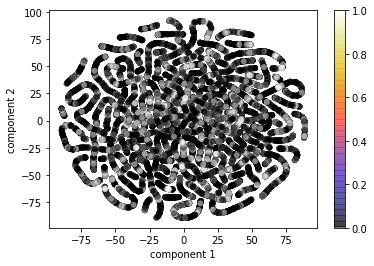

In [86]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

projected = TSNE(n_components=2).fit_transform(df.loc[:, df.columns != '>50K'])

plt.scatter(projected[:, 0], projected[:, 1],
            c=df['>50K'], edgecolor='none', alpha=0.5, cmap="CMRmap")
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

As in this dataset we are predicting the value that can be either true or false I thing that the best model would be some kind of regression (logistic or linear or svm) as there are only 2 clases. Befor geting to the model we firs must prepare the dataset for it. The data would need to be normilized, for example the fnlwgt column, looks like it is going out of scale in comparison with other columns. 